# Correlation function analysis

In [1]:
%pylab inline

from pathlib import Path

import h5py
import numpy as np
from isingchat import style
from isingchat.io import read_ising_config
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure
from ruamel.yaml import YAML
from scipy import interpolate as interp
from scipy.signal import savgol_filter
import pandas as pd
import json

import os
import re

yaml = YAML()

Populating the interactive namespace from numpy and matplotlib


In [2]:
def correlation_function_tl(
    r: int,
    w_norm_eigvals: np.ndarray,
    w_norm_eigvects: np.ndarray
):
    eigvals_norms: np.ndarray = np.abs(w_norm_eigvals)
    max_eigenvalue_norm_idx = eigvals_norms.argmax()
    max_eigenvalue_norm = eigvals_norms[max_eigenvalue_norm_idx]
    max_eigvect_norm = w_norm_eigvects[:, max_eigenvalue_norm_idx]
    reduced_eigvals = (w_norm_eigvals / max_eigenvalue_norm) ** r    
    # Multiply by sigma_z is the same as change signe a half values of vector
    len_vector = len(w_norm_eigvects)
    eigvector_times_sigma_z = np.concatenate((w_norm_eigvects[:int(len_vector/2)],
                                 -w_norm_eigvects[int(len_vector/2):]))    
    corr_function = 0
    for ind_eig in range(len(reduced_eigvals)):
        if ind_eig == max_eigenvalue_norm_idx:
            pass
        else:
            corr_function += (reduced_eigvals[ind_eig]) * (
                np.abs(max_eigvect_norm.dot(
                    eigvector_times_sigma_z[ind_eig])) ** 2
            )

    return corr_function

In [16]:
data_path = Path('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\isingchat\\data\\eigens\\regular\\infinite-size\\centrosym')
p=2.0
nv=14

file = 'p_{}\\p-{}_nv-{}_h-0_inv-temp_eig-{}.yml'.format(p,p,nv,2**nv)
config_file = Path(os.path.join(data_path,file)).resolve()
cor_length_file = config_file.with_suffix(".eigenvalues.h5")

# getting data
with config_file.open() as cfp:
    config_info = yaml.load(cfp)
config_data = read_ising_config(config_info)

with h5py.File(str(cor_length_file)) as h5fp:
#     data_eigenvalues = h5fp['eigens']['eigenvalues'][:]
#     data_eigenvectors = h5fp['eigens']['eigenvectors'][:]
    data_eigenvalues = h5fp['eigens']['eigenvalues'][2][0]
    data_eigenvectors = h5fp['eigens']['eigenvectors'][2][0]

with config_file.open() as cfp:
    config_info = yaml.load(cfp)
config_data = read_ising_config(config_info)

temp = config_data["system"]["inv_temperature"]
mag_field = config_data["system"]["magnetic_field"]

In [5]:
temp

array([0.4 , 0.5 , 0.55, 0.6 , 0.7 ])

# Ploting one correlation function

temp: 0.55


Text(0.5, 1.0, '$p=2.0, \\, J/k_BT=0.55$')

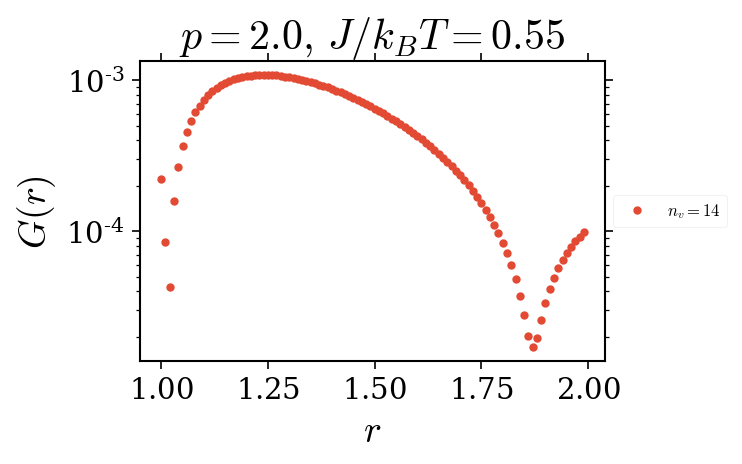

In [18]:
inv_temp_value = 0.55
# Plot settings
use_tex = False
# Load the default style.
style.use("default")
rcParams["text.usetex"] = use_tex

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

ax: Axes = fig1.add_subplot(grid_spec[0, 0])

#
markers = ["o",
           "^",
           "v",
           "s",
           "P",
           "*",
           "p",
           "h",
           "D",
           "X",
           "8",
           "d"]
#
line_styles = ["solid",
               "dotted",
               "dashed",
               "dashdot",
               (0,(1,1)),
               (0,(5,1)),
               (0,(3,1,1,1)),
               (0,(3,1,1,1,1,1)), 
               (0,(3,1,3,1,1,1)),
               (0,(5,1,3,1,1,1)),
               (0,(6,1,4,1,2,1)),
               (0,(1,10)),
               (0,(5,10)),
               (0,(3,10,1,10))]

#define
r_range = np.arange(1,2,0.01)
index_temp = 2
# index_temp = np.where(temp == temp[((inv_temp_value)<=temp) & (temp<=(inv_temp_value+0.1))][0])[0][0]
temp_value = temp[index_temp]
# eigenvalues = data_eigenvalues[index_temp][0]
# eigenvectors = data_eigenvectors[index_temp][0]
eigenvalues = data_eigenvalues
eigenvectors = data_eigenvectors

print('temp: {}'.format(temp_value))

cor_function = [abs(correlation_function_tl(r,eigenvalues, eigenvectors)) for r in r_range]

# ax.plot(r_range, cor_function, 
#                 marker=markers[0],
#                 markersize=5,
#                 mfc='none',
#                 lw=0,
#                 linestyle=line_styles[0],
#                 color='C{}'.format(0),
#                 label='$n_v={}$'.format(nv)
#                )
ind = 0
ax.semilogy(r_range, cor_function, 
            marker=markers[ind],
            markersize=3,
#                 mfc='none',
            lw=0,
            linestyle=line_styles[ind],
            color='C{}'.format(ind),
            label='$n_v={}$'.format(nv)
               )

#     x_sample = np.arange(0,5,0.1)
#     ax.semilogy(x_sample,np.exp(-4.2*x_sample),
#                markersize=3,
#     #                 mfc='none',
#                     lw=1,
#                     linestyle=line_styles[ind],
#                     color='C10',
#                )

ax.legend(loc='center left',
          bbox_to_anchor=(1, 0.5),
          fontsize=8)

# labels configurations
ax.xaxis.label.set_size(18)
# ax.set_xlabel(r"$\beta J$")
ax.set_xlabel(r"$r$")

ax.set_ylabel(r"$G(r)$")

ax.set_title(r"$p={}, \, J/k_BT={}$".format(p,temp_value))
# ax.set_title(r"$n_v={}$".format(nv))

#     ax.set_xlim(0,2)
# ax.set_ylim(10**-3,10**-1)

In [20]:
r_range_14 = r_range
cor_function_14 = cor_function

## Ploting correlation function

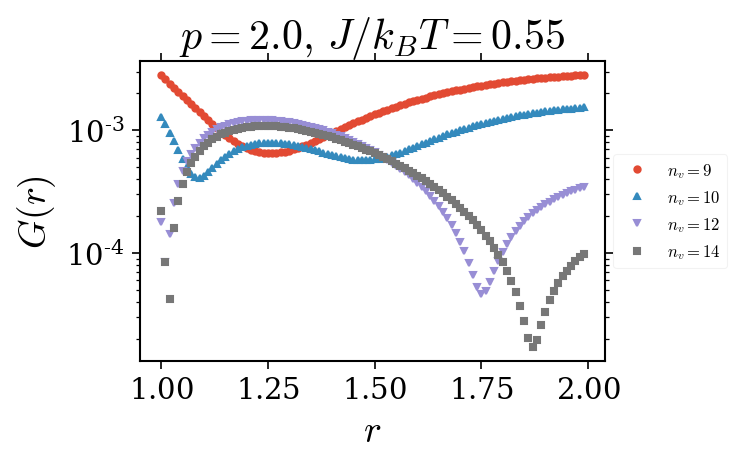

In [23]:
data_path = Path('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\isingchat\\data\\eigens\\regular\\infinite-size\\centrosym')
# inv_temp_value = 0.4
inv_temp_values = [
#     0.1,
#     0.2,
#     0.3,
#     0.4,
#     0.5,
    0.55,
#     0.59,
#     0.6
]

# ps=[
#     1.0,
#     1.05,
#     1.1,
#     1.2,
#     1.3,
#     1.4,
#     1.5,
#     1.6,
#     1.7,
#     1.8,
#     1.9,
#     2.0
# ]
p = 2.0

nvs=[
#     3,
#     4,
#     5,
#     6,
#     7,
#     8,
    9,
    10,
    12,
    14
]

#
markers = ["o",
           "^",
           "v",
           "s",
           "P",
           "*",
           "p",
           "h",
           "D",
           "X",
           "8",
           "d"]
#
line_styles = ["solid",
               "dotted",
               "dashed",
               "dashdot",
               (0,(1,1)),
               (0,(5,1)),
               (0,(3,1,1,1)),
               (0,(3,1,1,1,1,1)), 
               (0,(3,1,3,1,1,1)),
               (0,(5,1,3,1,1,1)),
               (0,(6,1,4,1,2,1)),
               (0,(1,10)),
               (0,(5,10)),
               (0,(3,10,1,10))]

for inv_temp_value in inv_temp_values:
    # Plot settings
    use_tex = False
    # Load the default style.
    style.use("default")
    rcParams["text.usetex"] = use_tex

    fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
    grid_spec = GridSpec(3, 1)

    ax: Axes = fig1.add_subplot(grid_spec[0, 0])

    for ind, nv in enumerate(nvs):
        if nv != 12 and nv != 14:
            file = 'p_{}\\p-{}_nv-{}_h-0_inv-temp_eig-{}.yml'.format(p,p,nv,2**nv)
            config_file = Path(os.path.join(data_path,file)).resolve()
            cor_length_file = config_file.with_suffix(".eigenvalues.h5")

            # getting data
            with config_file.open() as cfp:
                config_info = yaml.load(cfp)
            config_data = read_ising_config(config_info)

            with h5py.File(str(cor_length_file)) as h5fp:
                data_eigenvalues = h5fp['eigens']['eigenvalues'][:]
                data_eigenvectors = h5fp['eigens']['eigenvectors'][:]

            with config_file.open() as cfp:
                config_info = yaml.load(cfp)
            config_data = read_ising_config(config_info)

            temp = config_data["system"]["inv_temperature"]
            mag_field = config_data["system"]["magnetic_field"]

            #define
            r_range = np.arange(1,2,0.01)
        #     index_temp = 32
            index_temp = np.where(temp == temp[((inv_temp_value)<=temp) & (temp<=(inv_temp_value+0.1))][0])[0][0]
            temp_value = temp[index_temp]
            eigenvalues = data_eigenvalues[index_temp][0]
            eigenvectors = data_eigenvectors[index_temp][0]


            cor_function = [abs(correlation_function_tl(r,eigenvalues, eigenvectors)) for r in r_range]

            # ax.plot(r_range, cor_function, 
            #                 marker=markers[0],
            #                 markersize=5,
            #                 mfc='none',
            #                 lw=0,
            #                 linestyle=line_styles[0],
            #                 color='C{}'.format(0),
            #                 label='$n_v={}$'.format(nv)
            #                )
            ax.semilogy(r_range, cor_function, 
                        marker=markers[ind],
                        markersize=3,
        #                 mfc='none',
                        lw=0,
                        linestyle=line_styles[ind],
                        color='C{}'.format(ind),
                        label='$n_v={}$'.format(nv)
                           )
        elif nv == 12:
            file = 'p_{}\\p-{}_nv-{}_h-0_inv-temp_eig-{}_1.yml'.format(p,p,nv,2**nv)
            config_file = Path(os.path.join(data_path,file)).resolve()
            cor_length_file = config_file.with_suffix(".eigenvalues.h5")

            # getting data
            with config_file.open() as cfp:
                config_info = yaml.load(cfp)
            config_data = read_ising_config(config_info)

            with h5py.File(str(cor_length_file)) as h5fp:
                data_eigenvalues = h5fp['eigens']['eigenvalues'][:]
                data_eigenvectors = h5fp['eigens']['eigenvectors'][:]

            with config_file.open() as cfp:
                config_info = yaml.load(cfp)
            config_data = read_ising_config(config_info)

            temp = config_data["system"]["inv_temperature"]
            mag_field = config_data["system"]["magnetic_field"]

            #define
            r_range = np.arange(1,2,0.01)
        #     index_temp = 32
            index_temp = np.where(temp == temp[((inv_temp_value)<=temp) & (temp<=(inv_temp_value+0.1))][0])[0][0]
            temp_value = temp[index_temp]
            eigenvalues = data_eigenvalues[index_temp][0]
            eigenvectors = data_eigenvectors[index_temp][0]


            cor_function = [abs(correlation_function_tl(r,eigenvalues, eigenvectors)) for r in r_range]

            # ax.plot(r_range, cor_function, 
            #                 marker=markers[0],
            #                 markersize=5,
            #                 mfc='none',
            #                 lw=0,
            #                 linestyle=line_styles[0],
            #                 color='C{}'.format(0),
            #                 label='$n_v={}$'.format(nv)
            #                )
            ax.semilogy(r_range, cor_function, 
                        marker=markers[ind],
                        markersize=3,
        #                 mfc='none',
                        lw=0,
                        linestyle=line_styles[ind],
                        color='C{}'.format(ind),
                        label='$n_v={}$'.format(nv)
                           )            
        elif nv == 14:
            ax.semilogy(r_range_14, cor_function_14, 
                        marker=markers[ind],
                        markersize=3,
        #                 mfc='none',
                        lw=0,
                        linestyle=line_styles[ind],
                        color='C{}'.format(ind),
                        label='$n_v={}$'.format(nv)
                           )
        else:
            pass
        
#     x_sample = np.arange(0,5,0.1)
#     ax.semilogy(x_sample,np.exp(-4.2*x_sample),
#                markersize=3,
#     #                 mfc='none',
#                     lw=1,
#                     linestyle=line_styles[ind],
#                     color='C10',
#                )

    ax.legend(loc='center left',
              bbox_to_anchor=(1, 0.5),
              fontsize=8)

    # labels configurations
    ax.xaxis.label.set_size(18)
    # ax.set_xlabel(r"$\beta J$")
    ax.set_xlabel(r"$r$")

    ax.set_ylabel(r"$G(r)$")

    ax.set_title(r"$p={}, \, J/k_BT={}$".format(p,temp_value))
    # ax.set_title(r"$n_v={}$".format(nv))

#     ax.set_xlim(0,2)
    # ax.set_ylim(10**-3,10**-1)

## Plot loglog

C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:144: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


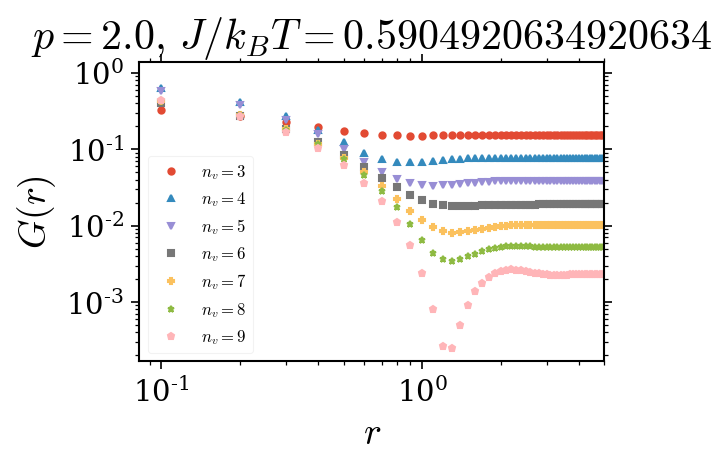

In [25]:
data_path = Path('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\isingchat\\data\\eigens\\regular\\infinite-size\\centrosym')
# inv_temp_value = 0.4
inv_temp_values = [
#     0.1,
#     0.2,
#     0.3,
#     0.4,
#     0.5,
#     0.55,
    0.59,
#     0.6
]

# ps=[
#     1.0,
#     1.05,
#     1.1,
#     1.2,
#     1.3,
#     1.4,
#     1.5,
#     1.6,
#     1.7,
#     1.8,
#     1.9,
#     2.0
# ]
p = 2.0

nvs=[
    3,
    4,
    5,
    6,
    7,
    8,
    9
]

#
markers = ["o",
           "^",
           "v",
           "s",
           "P",
           "*",
           "p",
           "h",
           "D",
           "X",
           "8",
           "d"]
#
line_styles = ["solid",
               "dotted",
               "dashed",
               "dashdot",
               (0,(1,1)),
               (0,(5,1)),
               (0,(3,1,1,1)),
               (0,(3,1,1,1,1,1)), 
               (0,(3,1,3,1,1,1)),
               (0,(5,1,3,1,1,1)),
               (0,(6,1,4,1,2,1)),
               (0,(1,10)),
               (0,(5,10)),
               (0,(3,10,1,10))]

for inv_temp_value in inv_temp_values:
    # Plot settings
    use_tex = False
    # Load the default style.
    style.use("default")
    rcParams["text.usetex"] = use_tex

    fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
    grid_spec = GridSpec(3, 1)

    ax: Axes = fig1.add_subplot(grid_spec[0, 0])

    for ind, nv in enumerate(nvs):
        file = 'p_{}\\p-{}_nv-{}_h-0_inv-temp_eig-{}.yml'.format(p,p,nv,2**nv)
        config_file = Path(os.path.join(data_path,file)).resolve()
        cor_length_file = config_file.with_suffix(".eigenvalues.h5")

        # getting data
        with config_file.open() as cfp:
            config_info = yaml.load(cfp)
        config_data = read_ising_config(config_info)

        with h5py.File(str(cor_length_file)) as h5fp:
            data_eigenvalues = h5fp['eigens']['eigenvalues'][:]
            data_eigenvectors = h5fp['eigens']['eigenvectors'][:]

        with config_file.open() as cfp:
            config_info = yaml.load(cfp)
        config_data = read_ising_config(config_info)

        temp = config_data["system"]["inv_temperature"]
        mag_field = config_data["system"]["magnetic_field"]

        #define
        r_range = np.arange(0,5,0.1)
    #     index_temp = 32
        index_temp = np.where(temp == temp[((inv_temp_value)<=temp) & (temp<=(inv_temp_value+0.1))][0])[0][0]
        temp_value = temp[index_temp]
        eigenvalues = data_eigenvalues[index_temp][0]
        eigenvectors = data_eigenvectors[index_temp][0]


        cor_function = [abs(correlation_function_tl(r,eigenvalues, eigenvectors)) for r in r_range]

        # ax.plot(r_range, cor_function, 
        #                 marker=markers[0],
        #                 markersize=5,
        #                 mfc='none',
        #                 lw=0,
        #                 linestyle=line_styles[0],
        #                 color='C{}'.format(0),
        #                 label='$n_v={}$'.format(nv)
        #                )
        ax.loglog(r_range, cor_function, 
                    marker=markers[ind],
                    markersize=3,
    #                 mfc='none',
                    lw=0,
                    linestyle=line_styles[ind],
                    color='C{}'.format(ind),
                    label='$n_v={}$'.format(nv)
                       )

    ax.legend(fontsize=8)

    # labels configurations
    ax.xaxis.label.set_size(18)
    # ax.set_xlabel(r"$\beta J$")
    ax.set_xlabel(r"$r$")

    ax.set_ylabel(r"$G(r)$")

    ax.set_title(r"$p={}, \, J/k_BT={}$".format(p,temp_value))
    # ax.set_title(r"$n_v={}$".format(nv))

    ax.set_xlim(0,5)
    # ax.set_ylim(10**-3,10**-1)

## Normal plot

In [ ]:
# Plot settings
use_tex = False
# Load the default style.
style.use("default")
rcParams["text.usetex"] = use_tex

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

ax: Axes = fig1.add_subplot(grid_spec[0, 0])

for ind, nv in enumerate(nvs):
    file = 'p_{}\\p-{}_nv-{}_h-0_inv-temp_eig-{}.yml'.format(p,p,nv,2**nv)
    config_file = Path(os.path.join(data_path,file)).resolve()
    cor_length_file = config_file.with_suffix(".eigenvalues.h5")

    # getting data
    with config_file.open() as cfp:
        config_info = yaml.load(cfp)
    config_data = read_ising_config(config_info)

    with h5py.File(str(cor_length_file)) as h5fp:
        data_eigenvalues = h5fp['eigens']['eigenvalues'][:]
        data_eigenvectors = h5fp['eigens']['eigenvectors'][:]

    with config_file.open() as cfp:
        config_info = yaml.load(cfp)
    config_data = read_ising_config(config_info)

    temp = config_data["system"]["inv_temperature"]
    mag_field = config_data["system"]["magnetic_field"]

    #define
    r_range = np.arange(0,5,0.1)
#     index_temp = 58
    index_temp = np.where(temp == temp[(0.50<temp) & (temp<=0.51)][0])[0][0]
    temp_value = temp[index_temp]
    eigenvalues = data_eigenvalues[index_temp][0]
    eigenvectors = data_eigenvectors[index_temp][0]


    cor_function = [abs(correlation_function_tl(r,eigenvalues, eigenvectors)) for r in r_range]

    ax.plot(r_range, cor_function, 
                marker=markers[ind],
                markersize=3,
#                 mfc='none',
                lw=1,
                linestyle=line_styles[ind],
                color='C{}'.format(ind),
                label='$n_v={}$'.format(nv)
                   )
#     ax.semilogy(r_range, cor_function, 
#                 marker=markers[ind],
#                 markersize=3,
# #                 mfc='none',
#                 lw=0,
#                 linestyle=line_styles[ind],
#                 color='C{}'.format(ind),
#                 label='$n_v={}$'.format(nv)
#                    )
    
ax.legend(fontsize=8)

# labels configurations
ax.xaxis.label.set_size(18)
# ax.set_xlabel(r"$\beta J$")
ax.set_xlabel(r"$r$")

ax.set_ylabel(r"$G(r)$")

ax.set_title(r"$p={}, \, J/k_BT={}$".format(p,temp_value))
# ax.set_title(r"$n_v={}$".format(nv))

ax.set_xlim(0,5)
# ax.set_ylim(10**-4,0.2)

(0.0, 5.0)

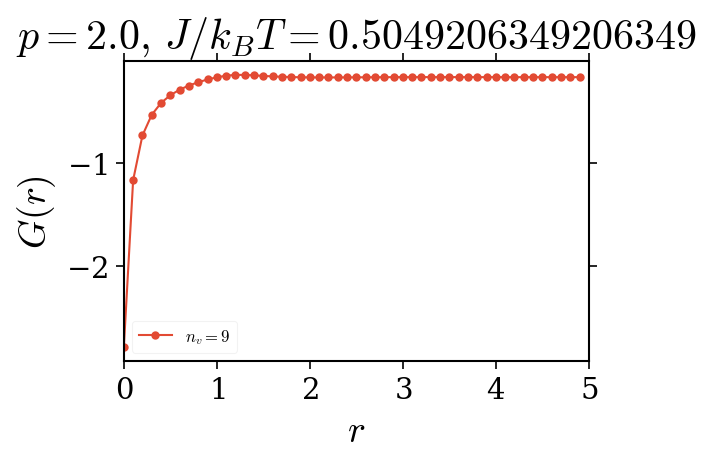

In [56]:
# Plot settings
use_tex = False
# Load the default style.
style.use("default")
rcParams["text.usetex"] = use_tex

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

ax: Axes = fig1.add_subplot(grid_spec[0, 0])

ind = 0
nv = 9

file = 'p_{}\\p-{}_nv-{}_h-0_inv-temp_eig-{}.yml'.format(p,p,nv,2**nv)
config_file = Path(os.path.join(data_path,file)).resolve()
cor_length_file = config_file.with_suffix(".eigenvalues.h5")

# getting data
with config_file.open() as cfp:
    config_info = yaml.load(cfp)
config_data = read_ising_config(config_info)

with h5py.File(str(cor_length_file)) as h5fp:
    data_eigenvalues = h5fp['eigens']['eigenvalues'][:]
    data_eigenvectors = h5fp['eigens']['eigenvectors'][:]

with config_file.open() as cfp:
    config_info = yaml.load(cfp)
config_data = read_ising_config(config_info)

temp = config_data["system"]["inv_temperature"]
mag_field = config_data["system"]["magnetic_field"]

#define
r_range = np.arange(0,5,0.1)
#     index_temp = 58
index_temp = np.where(temp == temp[(0.50<temp) & (temp<=0.51)][0])[0][0]
temp_value = temp[index_temp]
eigenvalues = data_eigenvalues[index_temp][0]
eigenvectors = data_eigenvectors[index_temp][0]


cor_function = [abs(correlation_function_tl(r,eigenvalues, eigenvectors)) for r in r_range]

ax.plot(r_range, 1/np.log(cor_function), 
            marker=markers[ind],
            markersize=3,
#                 mfc='none',
            lw=1,
            linestyle=line_styles[ind],
            color='C{}'.format(ind),
            label='$n_v={}$'.format(nv)
               )
#     ax.semilogy(r_range, cor_function, 
#                 marker=markers[ind],
#                 markersize=3,
# #                 mfc='none',
#                 lw=0,
#                 linestyle=line_styles[ind],
#                 color='C{}'.format(ind),
#                 label='$n_v={}$'.format(nv)
#                    )
    
ax.legend(fontsize=8)

# labels configurations
ax.xaxis.label.set_size(18)
# ax.set_xlabel(r"$\beta J$")
ax.set_xlabel(r"$r$")

ax.set_ylabel(r"$G(r)$")

ax.set_title(r"$p={}, \, J/k_BT={}$".format(p,temp_value))
# ax.set_title(r"$n_v={}$".format(nv))

ax.set_xlim(0,5)
# ax.set_ylim(10**-4,0.2)


## Plot 3d

<IPython.core.display.Javascript object>


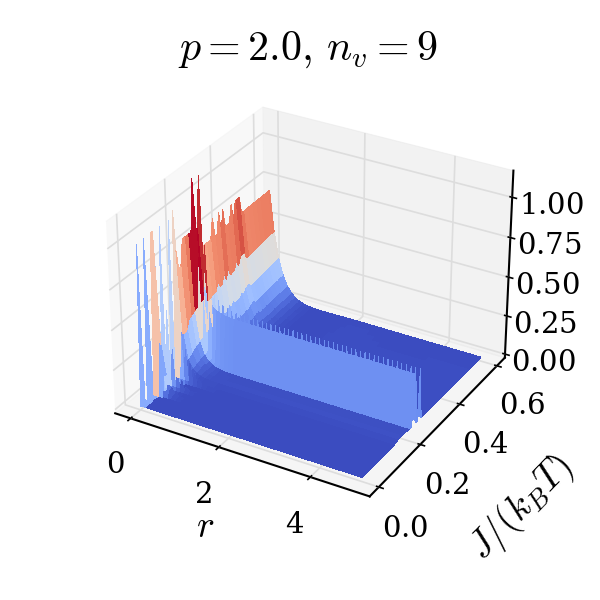

In [7]:
%matplotlib notebook
data_path = Path('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\isingchat\\data\\eigens\\regular\\infinite-size\\centrosym')

# ps=[
#     1.0,
#     1.05,
#     1.1,
#     1.2,
#     1.3,
#     1.4,
#     1.5,
#     1.6,
#     1.7,
#     1.8,
#     1.9,
#     2.0
# ]
p = 2.0

# nvs=[
#     3,
#     4,
#     5,
#     6,
#     7,
#     8,
#     9
# ]
nv = 9

#
markers = ["o",
           "^",
           "v",
           "s",
           "P",
           "*",
           "p",
           "h",
           "D",
           "X",
           "8",
           "d"]
#
line_styles = ["solid",
               "dotted",
               "dashed",
               "dashdot",
               (0,(1,1)),
               (0,(5,1)),
               (0,(3,1,1,1)),
               (0,(3,1,1,1,1,1)), 
               (0,(3,1,3,1,1,1)),
               (0,(5,1,3,1,1,1)),
               (0,(6,1,4,1,2,1)),
               (0,(1,10)),
               (0,(5,10)),
               (0,(3,10,1,10))]

# Plot settings
use_tex = False
# Load the default style.
style.use("default")
rcParams["text.usetex"] = use_tex

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

file = 'p_{}\\p-{}_nv-{}_h-0_inv-temp_eig-{}.yml'.format(p,p,nv,2**nv)
config_file = Path(os.path.join(data_path,file)).resolve()
cor_length_file = config_file.with_suffix(".eigenvalues.h5")

# getting data
with config_file.open() as cfp:
    config_info = yaml.load(cfp)
config_data = read_ising_config(config_info)

with h5py.File(str(cor_length_file)) as h5fp:
    data_eigenvalues = h5fp['eigens']['eigenvalues'][:]
    data_eigenvectors = h5fp['eigens']['eigenvectors'][:]

with config_file.open() as cfp:
    config_info = yaml.load(cfp)
config_data = read_ising_config(config_info)

temp = config_data["system"]["inv_temperature"]
mag_field = config_data["system"]["magnetic_field"]

#define
r_range = np.arange(0,5,0.1)

cor_function = np.empty([len(temp),len(r_range)])
for ind_r,r in enumerate(r_range):
    for ind_t,t in enumerate(temp):
        eigenvalues = data_eigenvalues[ind_t][0]
        eigenvectors = data_eigenvectors[ind_t][0]

        cor_function[ind_t][ind_r] = abs(correlation_function_tl(r,eigenvalues, eigenvectors))

X, Y = np.meshgrid(r_range, temp)

# Plot the surface.
ax.plot_surface(X, Y, cor_function, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# labels configurations
ax.xaxis.label.set_size(18)
# ax.set_xlabel(r"$\beta J$")
ax.set_xlabel(r"$r$",)
ax.set_ylabel(r"$J/(k_BT)$",labelpad=15)
ax.set_zlabel(r"$G(r)$",labelpad=15)

ax.set_title(r"$p={}, \, n_v={}$".format(p,nv))
# ax.set_title(r"$n_v={}$".format(nv))

# ax.set_xlim(0,5)
# ax.set_ylim(10**-3,10**-1)

plt.show()

<IPython.core.display.Javascript object>


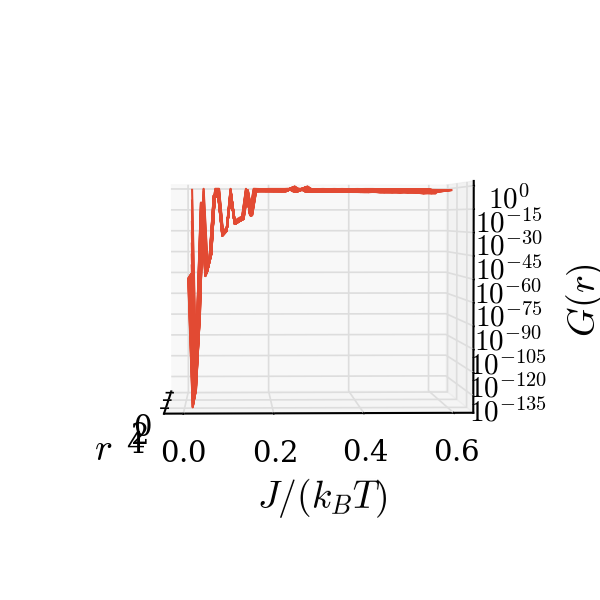

C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib notebook
def log_tick_formatter(val, pos=None):
    return f"$10^{{{int(val)}}}$"
# Plot settings
use_tex = False
# Load the default style.
style.use("default")
rcParams["text.usetex"] = use_tex

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
# ax.plot_surface(X, Y, np.log10(cor_function), cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)

ax.plot_wireframe(X, Y, np.log10(cor_function), 
#                   rstride=1, cstride=1
                 )

ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# labels configurations
ax.xaxis.label.set_size(18)
# ax.set_xlabel(r"$\beta J$")
ax.set_xlabel(r"$r$",)
ax.set_ylabel(r"$J/(k_BT)$",labelpad=15)
ax.set_zlabel(r"$G(r)$",labelpad=15)

plt.show()

In [85]:
np.log10(cor_function)

C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


array([[         -inf,          -inf,          -inf, ...,          -inf,
                 -inf,          -inf],
       [   0.        ,   -7.64054265,  -15.2810853 , ...,  -59.45370096,
         -59.45370096,  -59.45370096],
       [-133.33543513, -137.03545749, -140.4558229 , ..., -142.79155446,
        -142.79155446, -142.79155446],
       ...,
       [  -0.1543067 ,   -0.35648449,   -0.56357833, ...,   -2.61818349,
          -2.61839515,   -2.61859407],
       [  -0.155158  ,   -0.35593424,   -0.56177887, ...,   -2.63160274,
          -2.63184811,   -2.63207919],
       [  -0.15400627,   -0.35326654,   -0.55776244, ...,   -2.62780047,
          -2.62791398,   -2.62802446]])

In [54]:
X = np.arange(-1, 1, 0.5)
Y = np.arange(-1, 1, 0.5)
X, Y = np.meshgrid(X, Y)
Z = np.sqrt(X**2 + Y**4)

In [45]:
for temp in tempX

array([[-1. , -0.5,  0. ,  0.5],
       [-1. , -0.5,  0. ,  0.5],
       [-1. , -0.5,  0. ,  0.5],
       [-1. , -0.5,  0. ,  0.5]])

In [44]:
Y

array([[-1. , -1. , -1. , -1. ],
       [-0.5, -0.5, -0.5, -0.5],
       [ 0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0.5,  0.5,  0.5]])

In [55]:
Z

array([[1.41421356, 1.11803399, 1.        , 1.11803399],
       [1.03077641, 0.55901699, 0.25      , 0.55901699],
       [1.        , 0.5       , 0.        , 0.5       ],
       [1.03077641, 0.55901699, 0.25      , 0.55901699]])

In [56]:
Z[0][1]

1.118033988749895

In [57]:
np.sqrt((-0.5)**2 + (-1)**4)

1.118033988749895